In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
plt.rcParams['figure.figsize'] = [7,5]
plt.rcParams['figure.dpi'] = 120

In [4]:
    # data: двумерный массив или DataFrame, который будет визуализироваться;
    # vmin и vmax: минимальные и максимальные значения для цветовой шкалы. По умолчанию vmin и vmax задаются автоматически на основе минимальных и максимальных значений данных;
    # cmap: цветовая карта для отображения значений;
    # center: параметр center задает центральное значение для цветовой шкалы;
    # square: когда square=True, каждая ячейка в тепловой карте будет квадратной (по умолчанию square=False);
    # robust: когда robust=True, цветовая шкала определяется на основе 2-го и 98-го процентилей данных, а не минимального и максимального значений (по умолчанию robust=False). Полезно использовать, когда в данных есть выбросы, которые могут искажать визуализацию, создавая слишком широкий диапазон значений для цветовой шкалы;
    # annot: если установлено в True, то на ячейках будут отображаться числовые значения;
    # annot_kws: используется для настройки аннотаций (текстовых меток), отображаемых внутри ячеек тепловой карты;
    # fmt: формат строк для аннотаций. Например, 'd' для целых чисел, '.2f' для чисел с двумя знаками после запятой;
    # linewidths: толщина линий, разделяющих ячейки;
    # linecolor: цвет линий, разделяющих ячейки;
    # cbar: если установлено в True, то будет отображаться цветовая шкала (color bar);
    # cbar_kws: словарь с параметрами для настройки цветовой шкалы;
    # xticklabels и yticklabels: метки для осей X и Y. Можно передать список меток, или использовать True для автоматической генерации меток на основе данных;
    # mask: булева матрица такого же размера, как и данные. Если элемент маски равен True, то соответствующая ячейка будет скрыта;
    # ax: позволяет указать оси (axes) matplotlib, на которых будет построен график.

In [19]:
df = sns.load_dataset('mpg', dtype={'cylinders': 'category', 'origin': 'category'}).dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [7]:
# 'mpg': расход топлива, измеренный в милях на галлон (miles per gallon);
# 'cylinders': количество цилиндров в двигателе;
# 'displacement': объем двигателя, измеренный в кубических дюймах;
# 'horsepower': мощность двигателя, измеренная в лошадиных силах;
# 'weight': вес автомобиля в фунтах;
# 'acceleration': время разгона с 0 до 60 миль в час, измеренное в секундах;
# 'model_year': год выпуска модели автомобиля;
# 'origin': страна происхождения автомобиля (США, Европа, Япония);
# 'name': название модели автомобиля.

In [15]:
df = (df
     .assign(cylinders = lambda x: x['cylinders'].astype('category'),
            origin = lambda x: x['origin'].astype('category'),
            )
)

In [21]:
df_num_only = (
    df
        .select_dtypes(['number'])
)

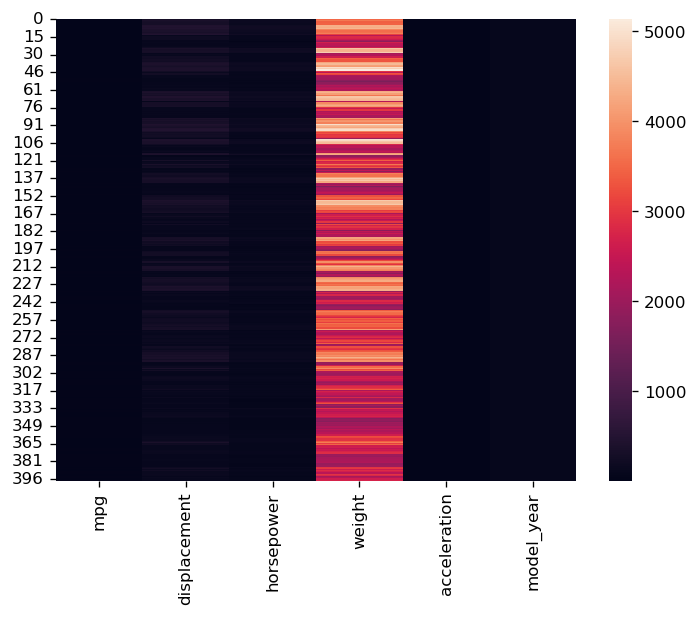

In [23]:
sns.heatmap(df_num_only);

In [31]:
df_agg = (
    df.pivot_table(values = 'horsepower',
                  index = 'cylinders',
                  columns = 'origin',
                  aggfunc = 'count',
                  fill_value = 0)
)

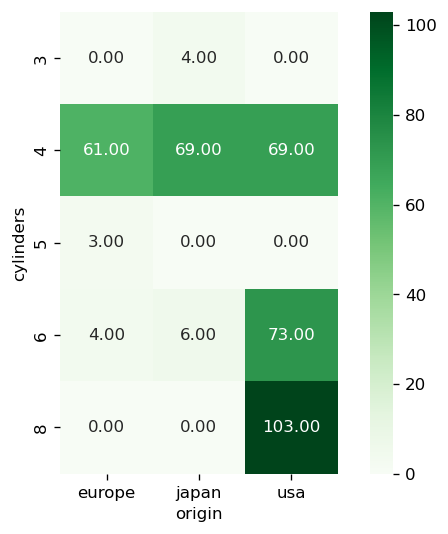

In [34]:
sns.heatmap(df_agg, 
           cmap = 'Greens',
           annot = True,
           fmt = '.2f',        # 'd' for integers
            square = True
           );

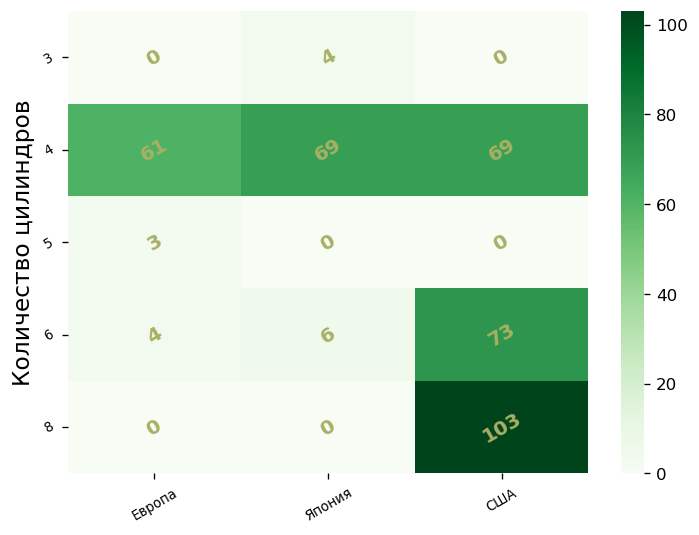

In [50]:
# параметр annot_kws
#     fontsize: размер шрифта аннотаций;
#     fontstyle: стиль шрифта аннотаций (например, 'italic');
#     fontweight: толщина шрифта (например, 'bold');
#     'fontfamily': вид шрифта (например, 'serif');
#     color: цвет текста аннотаций;
#     alpha: прозрачность текста аннотаций;
#     rotation: угол поворота текста аннотаций;
#     horizontalalignment: горизонтальное выравнивание текста;
#     verticalalignment: вертикальное выравнивание текста.

sns.heatmap(df_agg,
            cmap='Greens',
            annot=True,
            fmt='.0f',
            annot_kws={'fontsize': 12,
                       'color': '#a8b064',
                      'fontweight':'bold',
                      'rotation': 30},
            xticklabels=['Европа', 'Япония', 'США']
           )
plt.xticks(fontsize=8, rotation=30)
plt.yticks(fontsize=8, rotation=30)
plt.xlabel("")
plt.ylabel("Количество цилиндров", fontsize=14);